In [1]:
%matplotlib inline
from qiskit.pulse import DriveChannel, Schedule, Play
from qiskit.pulse.library import Gaussian
from qiskit.pulse.macros import measure_all, measure
from qiskit import IBMQ, execute
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.test.mock import FakeAlmaden

fake_backend = FakeAlmaden()
backend = IBMQ.load_account().get_backend(open_pulse=True)
print("Selected Backend:", backend.name)

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Selected Backend: <bound method BaseBackend.name of <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>>


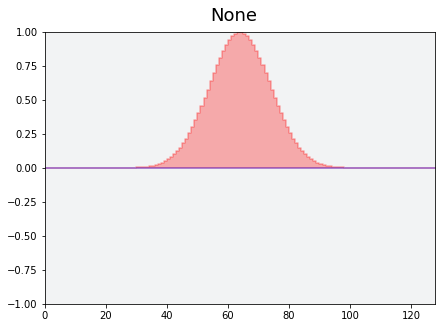

In [2]:
pulse = Gaussian(128, 1, 10, name="Parametric Gaus")
pulse.draw()

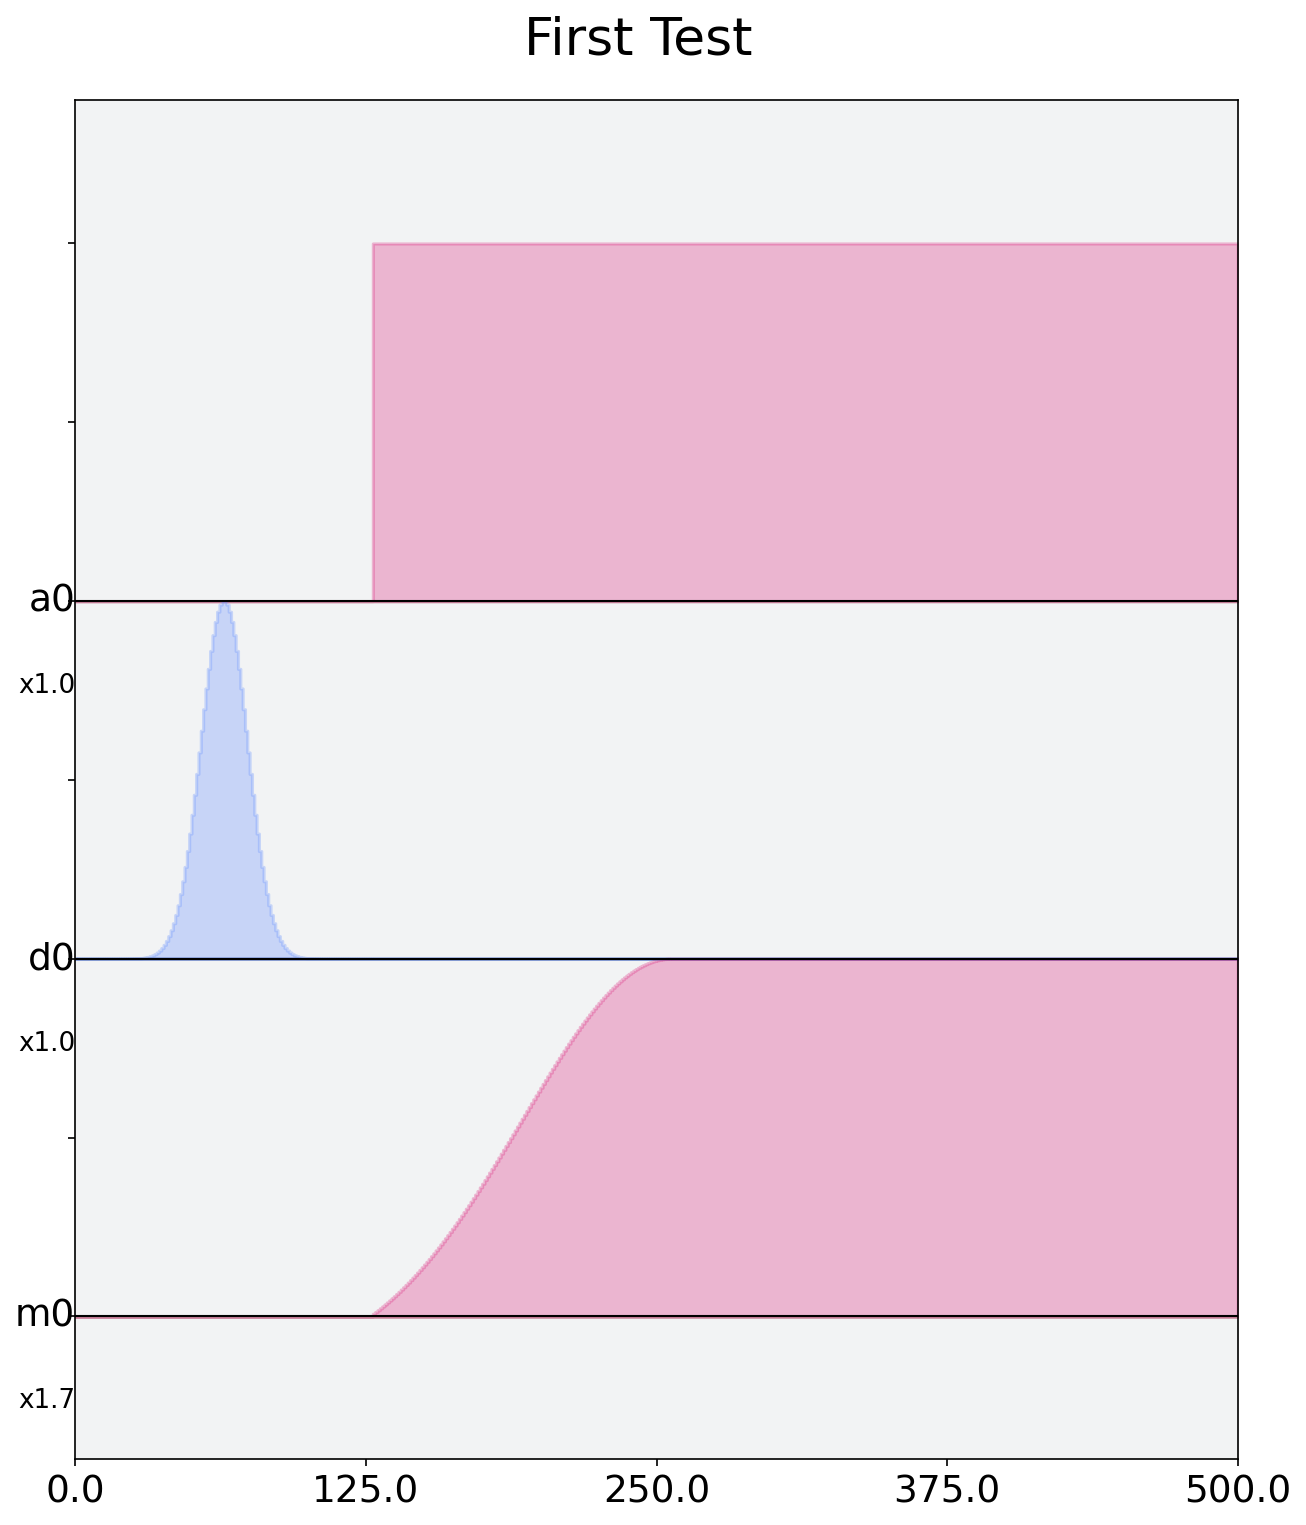

In [3]:
channel = DriveChannel(0)
sched = Schedule(name="First Test")

sched = sched.insert(0, Play(pulse, channel))
sched = sched.insert(sched.duration, measure(qubits=[0], backend=backend))
sched.draw(plot_range=[0, 500])

/opt/conda/lib/python3.7/site-packages/qiskit/compiler/assemble.py:323: RuntimeWarning: Dynamic rep rates not supported on this backend. rep_time will be used instead of rep_delay.
  RuntimeWarning,


Job Status: job has successfully run


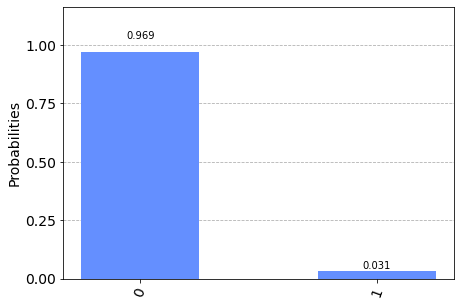

In [4]:
job = execute(sched, backend)
job_monitor(job)
plot_histogram(job.result().get_counts())